In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Empirical Distribution of a statistic

In [5]:
united = Table.read_table('data/united.csv')
united.sort('Delay', descending = True)
# observe some flights were almost 10 hours late!

np.average(united.column('Delay')) # extract our delay column as an array
# we can pass an array into a function, like np.average

# average flight is only 16 min...
# and the median flight delay is: 2 min
np.median(united.column('Delay')) 

# so this means, we have tons of outliers, and the bulk of our flights are probably between 0min late and 2-2.5 hours late

2.0

In [7]:
# generate samples from united data set, we can think of our united data set as a stand-in population
# let's exclude our outliers
united = united.where('Delay', are.below(200))
united
np.average(united.column('Delay')), np.median(united.column('Delay'))
# notice the average is affected by outliers, while the median is not....


(14.424308747355365, 2.0)

# Swain vs. Alabama ##

In [ ]:
# null: there was NO bias in the jury panel selection, it was randomly selected from talladega county, alabama
# alternative: there was bias, the jury panel was not completely randomly selected from talladega county, alabama

# observed statistic: 8 black men out of 100 men in the jury panel
# chosen statistic to decide between the null/alternative: # of black men on the 100-person jury panel

# we are going to simulate another jury panel from talladega county, alabama which at that time, had about 25-26% black men in the population
# we are simulating under the null (assuming there was no bias) 
# and we are going to see, are we ever able to simulate a jury panel like the one that happened in real life (observed statistic)


In [8]:
talladega_pop = 3_300_000 # population in talladega county at the time
black_proportion = 0.26 # 26% of the pop was black
white_proportion = 0.74 # 74% of the pop was white
n_panel = 100

In [15]:
black = np.repeat('black', int(black_proportion*talladega_pop)) #0.26 * 3_300_000
# black = ('black', 'black', ....'black') and will have a length of 0.26 * 3_300_000 = 858_000
white = np.repeat('white', int(white_proportion*talladega_pop)) #0.74 * 3_300_000
# white = ('white', 'white', ...'white) and will have a length of 0.74 * 3_300_000 = 2,442,000
people = np.append(black, white)
people_t = Table().with_column('people', people)
#people_t # this is our talladega county pop in a table
# the above lines of code, do the same thing as a function we'll introduce
# it is called sample_proportion

In [29]:
# simulate a sample from the people_t population table
# to simulate our own jury panel, remember we are simulating under the null hypothesis: there was no bias in the selection
panel = people_t.sample(n_panel).group('people')
panel
num_black_men_panel = panel.column('count').item(0)
num_black_men_panel

# we are doing a great job, simulating under the null hypothesis (operating under the assumption that the null is true)
# this means, the number of black men in our simulated jury panel should be close to the true proportions in the population

# are we ever able to simulate what actually happened -- observed statistic (8 black men on the jury panel)

19

In [30]:
# note that the exact value of n_people is irrelevant. We get the same results if we set it to e.g., 100 or some other number
# it's the proportions of the ethnicities in the pop that matters
# also note, that we had to write a lot of code. but there is an easier way, introduce sample_proportions()

pop_proportions = make_array(black_proportion, white_proportion)
pop_proportions
# 0.26 = black proportion in talladega county, or 26%
# 0.74 (the second element in my array) is my white proportion, or 74%

array([ 0.26,  0.74])

In [37]:
sim_jury_panel = sample_proportions(n_panel, pop_proportions)

# sample_proportions(size of sample, array that stores the proportions/demographics of pop)
# sample_proportions will generate a sample, of a given size, from a population of multiple groups/ethnicities
# it will generate a random sample, from this population and will show us the representation of the different groups/ethnicities in our 
# sample

# 0.31 or 31% of my jury panel of size 100, is black
# 31 black men
# 0.69 or 69% of my jury panel of size 100, is white
# 69 white men

# let's grab the first item in the array, this acts as our simulated statistic (number of black men in our jury panel
sim_jury_panel.item(0)

0.24

In [38]:
# let's put sample_proportions into a function, so that we can call on it in a for loop
def panel_proportion():
    sim_jury_panel = sample_proportions(n_panel, pop_proportions) 
    # same thing as
    #sim_jury_panel = sample_proportions(100, make_array(0.26, 0.74))
    sim_statistic = sim_jury_panel.item(0)
    return sim_statistic # number of black men on our jury panel of 100


In [43]:
panel_proportion()

0.2

In [56]:
# run it 10_000, simulate 10_000 jury panels and find the variation/distribution of number of black men on a jury panel
# if there was NO bias in the selection
# simulating under the null

panels = make_array()

for i in np.arange(10_000): # i will traverse through the array(0, 1, ... 9_999)
    # i acts as a counter here, this for loop will run 10_000
    # allowing us to simulate 10_000 jury panels
    # and capture the sim_statistic (num of black men on each jury panel)
    new_panel = panel_proportion() # new_panel will be something like 0.2, or 0.18 or 0.3 (proportion of black men on my panel)
    panels = np.append(panels, new_panel) # the first time, our for loop runs, we will append the proportion above to an empty array
    # e.g., panels = (0.2)
    # second time this for loop runs, panels will look something like (0.2, 0.18)
    # third time, (0.2, 0.18, 0.3)

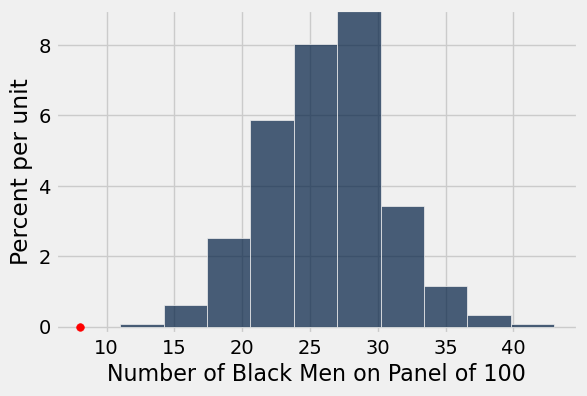

In [58]:
len(panels)
panels
# we created our array of 10_000 simulated statistics (num of black men on panels)
# now let's add our array to Table, so that we can create a histogram and see the distribution of black men on a jury panel
# when there is NO bias (completely random) in the selection process
panel = Table().with_column("Number of Black Men on Panel of 100", panels * 100)
panel.hist() # # let's first see the histogram with proportions

# plot some more details (observed statistic)
# these plotting lines are a bit out of scope for this class
plots.ylim(-0.002, 0.09)
plots.scatter(8,0,color='red', s=30); # observed statistic in red


# were we ever able to simulate the observed statistic (what actually happened?)
# should we accept the null? (fail to reject the null)
# NO bias
# OR
# should we reject the null (and lean toward the alternative)
# there is bias in the selection

# answer on your own here...
# can you read /interpret our results from this histogram
# and phrase your answer in the context of the original data science question
# is there bias or not in the original selection for the jury panel?
# were we ever able to generate a jury panel that looked likt he original, assuming there was no bias?

In [48]:
# run it 10_000, simulate 10_000 jury panels and find the variation/distribution of number of black men on a jury panel
# if there was NO bias in the selection
# simulating under the null

panels = make_array()

for i in np.arange(10): # i will traverse through the array(0, 1, ... 9)
    # i acts as a counter here, this for loop will run 10
    # allowing us to simulate 10 jury panels
    # and capture the sim_statistic (num of black men on each jury panel)
    print(i)
    new_panel = panel_proportion() # new_panel will be something like 0.2, or 0.18 or 0.3 (proportion of black men on my panel)
    print(new_panel)
    panels = np.append(panels, new_panel) # the first time, our for loop runs, we will append the proportion above to an empty array
    print(panels)
    # e.g., panels = (0.2)
    # second time this for loop runs, panels will look something like (0.2, 0.18)
    # third time, (0.2, 0.18, 0.3)

0
0.31
[ 0.31]
1
0.22
[ 0.31  0.22]
2
0.23
[ 0.31  0.22  0.23]
3
0.28
[ 0.31  0.22  0.23  0.28]
4
0.32
[ 0.31  0.22  0.23  0.28  0.32]
5
0.13
[ 0.31  0.22  0.23  0.28  0.32  0.13]
6
0.29
[ 0.31  0.22  0.23  0.28  0.32  0.13  0.29]
7
0.24
[ 0.31  0.22  0.23  0.28  0.32  0.13  0.29  0.24]
8
0.26
[ 0.31  0.22  0.23  0.28  0.32  0.13  0.29  0.24  0.26]
9
0.25
[ 0.31  0.22  0.23  0.28  0.32  0.13  0.29  0.24  0.26  0.25]


In [51]:
# run it 10_000, simulate 10_000 jury panels and find the variation/distribution of number of black men on a jury panel
# if there was NO bias in the selection
# simulating under the null

panels = make_array()

for i in make_array(0,1,2,3,4,5,6,7,8,9): # i will traverse through the array(0, 1, ... 9)
# template for our for loop header is
# for i in some_array:
    # i acts as a counter here, this for loop will run 10
    # allowing us to simulate 10 jury panels
    # and capture the sim_statistic (num of black men on each jury panel)
    print("i = ", i)
    print("for loop # = ", i+1)
    new_panel = panel_proportion() # new_panel will be something like 0.2, or 0.18 or 0.3 (proportion of black men on my panel)
    print('new_panel = ', new_panel)
    panels = np.append(panels, new_panel) # the first time, our for loop runs, we will append the proportion above to an empty array
    print('panels = ', panels)
    # e.g., panels = (0.2)
    # second time this for loop runs, panels will look something like (0.2, 0.18)
    # third time, (0.2, 0.18, 0.3)

i =  0
for loop # =  1
new_panel =  0.29
panels =  [ 0.29]
i =  1
for loop # =  2
new_panel =  0.19
panels =  [ 0.29  0.19]
i =  2
for loop # =  3
new_panel =  0.25
panels =  [ 0.29  0.19  0.25]
i =  3
for loop # =  4
new_panel =  0.28
panels =  [ 0.29  0.19  0.25  0.28]
i =  4
for loop # =  5
new_panel =  0.28
panels =  [ 0.29  0.19  0.25  0.28  0.28]
i =  5
for loop # =  6
new_panel =  0.31
panels =  [ 0.29  0.19  0.25  0.28  0.28  0.31]
i =  6
for loop # =  7
new_panel =  0.31
panels =  [ 0.29  0.19  0.25  0.28  0.28  0.31  0.31]
i =  7
for loop # =  8
new_panel =  0.34
panels =  [ 0.29  0.19  0.25  0.28  0.28  0.31  0.31  0.34]
i =  8
for loop # =  9
new_panel =  0.3
panels =  [ 0.29  0.19  0.25  0.28  0.28  0.31  0.31  0.34  0.3 ]
i =  9
for loop # =  10
new_panel =  0.27
panels =  [ 0.29  0.19  0.25  0.28  0.28  0.31  0.31  0.34  0.3   0.27]


# Mendel and Pea Flowers 

Mendel had 929 plants, of which 709 had purple flowers